In [1]:
import pandas as pd
import numpy as np
#import researchpy as rp
from scipy import stats

import matplotlib.pyplot as plt
#import pydotplus
from matplotlib import rcParams
import seaborn as sb

In [2]:
# # Find no. of factors in y
from collections import Counter
# #label encoding
from sklearn.preprocessing import LabelEncoder, scale, MinMaxScaler, StandardScaler,OneHotEncoder,LabelBinarizer
#from sklearn.decomposition import PCA

In [3]:
# Import All classifcation Algorithms
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from xgboost import XGBClassifier

In [4]:
from sklearn.model_selection import train_test_split, GridSearchCV,cross_val_score,validation_curve,KFold

In [5]:
# Metrics selection
from sklearn.metrics import  accuracy_score, recall_score, confusion_matrix,precision_recall_fscore_support,classification_report,roc_curve

In [6]:
# read data file
df1 = pd.read_csv('2_Employee_performance_withOutOutliers.csv')
print(df1.shape)

(1134, 28)


In [7]:
X1 = df1.iloc[:,:-1]
y1 = df1.y_PerformanceRating

In [8]:
# Split 80:20
split_seed = 10
X1_train, X1_test, y1_train, y1_test = train_test_split(X1,y1,random_state=split_seed, test_size=.2)

# Scaling done based on EDA analysis. Fit on the Train set, but tranform both transform both training and test set

In [10]:
# Create All lists
import warnings
warnings.filterwarnings("ignore")
ColList = ['Age ','DistanceFromHome', 'EmpEducationLevel', 'EmpEnvironmentSatisfaction','EmpHourlyRate','EmpJobInvolvement ',
           'EmpJobLevel','EmpJobSatisfaction','EmpLastSalaryHikePercent','EmpRelationshipSatisfaction','EmpWorkLifeBalance',
           'ExperienceYearsAtThisCompany','ExperienceYearsInCurrentRole','NumCompaniesWorked','TotalWorkExperienceInYears',
           'TrainingTimesLastYear','YearsSinceLastPromotion','YearsWithCurrManager','PerformanceRating','Attrition','BusinessTravelFrequency', 'EducationBackground', 'EmpDepartment',
           'EmpJobRole','Gender','MaritalStatus','OverTime']
ConVarList= ['q_Age','q_DistanceFromHome','q_EmpEducationLevel', 'q_EmpEnvironmentSatisfaction','q_EmpHourlyRate', 'q_EmpJobInvolvement', 'q_EmpJobLevel',
       'q_EmpJobSatisfaction', 'q_NumCompaniesWorked','q_EmpLastSalaryHikePercent', 'q_EmpRelationshipSatisfaction',
       'q_TotalWorkExperienceInYears', 'q_TrainingTimesLastYear','q_EmpWorkLifeBalance', 'q_ExperienceYearsAtThisCompany',
       'q_ExperienceYearsInCurrentRole', 'q_YearsSinceLastPromotion','q_YearsWithCurrManager']
CatVarList=['c_EmpNumber', 'c_Gender', 'c_EducationBackground','c_MaritalStatus', 'c_EmpDepartment', 'c_EmpJobRole',
       'c_BusinessTravelFrequency','c_OverTime','c_Attrition']
OutcomeVar=['y_PerformanceRating']
# Initialize
scaler = StandardScaler()
# Fit on train data
scaler.fit(X1_train[ConVarList])
# Transform both train and test
X1_train[ConVarList] = scaler.transform(X1_train[ConVarList])
X1_test[ConVarList] = scaler.transform(X1_test[ConVarList])

# Optimization of hyperparameters using Grid search and random state variations

In [11]:
'''
parameters = {"learning_rate": [.05,.1, .15],
              "max_depth": [3,5,8,10,15,20],
              "min_child_weight" : [ 3, 5, 7 ],
              "gamma"            : [ 0.0, 0.1,0.2],
              "colsample_bytree" : [ 0.1,0.7,0.8], 
              "scoring"         : ["accuracy"] 
             }

'''

parameters = {'colsample_bytree': [0.7],
              'gamma': [0.0],
              'learning_rate': [0.05],
              'max_depth': [3],
              'min_child_weight': [3],
              'n_estimators': [100],
              'scoring': ['accuracy']
             }

model = XGBClassifier(booster='gbtree',random_state=10)
grid_model_XGB = GridSearchCV(model, parameters)
grid_model_XGB.fit(X1_train, y1_train)

[16:29:52] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:573: 
Parameters: { "scoring" } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[16:29:52] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[16:29:53] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:573: 
Parameters: { "scoring" } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used b

GridSearchCV(estimator=XGBClassifier(base_score=None, booster='gbtree',
                                     colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, gamma=None,
                                     gpu_id=None, importance_type='gain',
                                     interaction_constraints=None,
                                     learning_rate=None, max_delta_step=None,
                                     max_depth=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     n_estimators=100, n_jobs=None,
                                     num_parallel_tree=None, random_state=10,
                                     reg_alpha=None, reg_lambda=None,
                                     scale_pos_weight=None, subsample=None,
                                     tree_method=None, validate_paramet

In [12]:
grid_model_XGB.best_params_

{'colsample_bytree': 0.7,
 'gamma': 0.0,
 'learning_rate': 0.05,
 'max_depth': 3,
 'min_child_weight': 3,
 'n_estimators': 100,
 'scoring': 'accuracy'}

In [13]:
y1_predict = pd.DataFrame(grid_model_XGB.predict(X1_test),columns=['y_s'])
print(confusion_matrix(y1_test,y1_predict))
print(accuracy_score(y1_test,y1_predict).round(4)*100)
print(classification_report(y1_test,y1_predict))

[[ 29   9   0]
 [  2 163   1]
 [  0   3  20]]
93.39
              precision    recall  f1-score   support

           2       0.94      0.76      0.84        38
           3       0.93      0.98      0.96       166
           4       0.95      0.87      0.91        23

    accuracy                           0.93       227
   macro avg       0.94      0.87      0.90       227
weighted avg       0.93      0.93      0.93       227



# Final Model

In [14]:
model = XGBClassifier(booster='gbtree',
                      random_state=10,
                      learning_rate=0.05,
                      max_depth=3,
                      min_child_weight=3,
                      gamma = 0.0,
                      colsample_bytree=0.8,
                      scoring='accuracy'
                     )
model.fit(X1_train, y1_train)

[16:30:07] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:573: 
Parameters: { "scoring" } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[16:30:07] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.8, gamma=0.0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.05, max_delta_step=0, max_depth=3,
              min_child_weight=3, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=4, num_parallel_tree=1,
              objective='multi:softprob', random_state=10, reg_alpha=0,
              reg_lambda=1, scale_pos_weight=None, scoring='accuracy',
              subsample=1, tree_method='exact', validate_parameters=1,
              verbosity=None)

In [15]:
# Results
y1_predict = pd.DataFrame(model.predict(X1_test),columns=['y_salary_band'])
print(confusion_matrix(y1_test,y1_predict))
print(accuracy_score(y1_test,y1_predict).round(4)*100)
print(classification_report(y1_test,y1_predict))

[[ 29   9   0]
 [  2 163   1]
 [  0   3  20]]
93.39
              precision    recall  f1-score   support

           2       0.94      0.76      0.84        38
           3       0.93      0.98      0.96       166
           4       0.95      0.87      0.91        23

    accuracy                           0.93       227
   macro avg       0.94      0.87      0.90       227
weighted avg       0.93      0.93      0.93       227



# Feature Importance

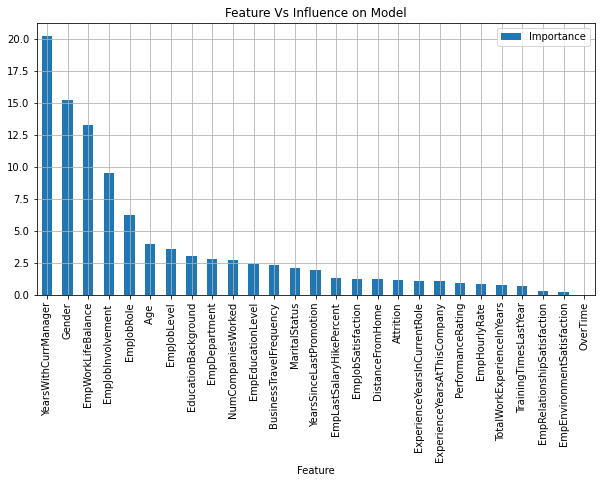

In [16]:
ColList = ['Age ','DistanceFromHome', 'EmpEducationLevel', 'EmpEnvironmentSatisfaction','EmpHourlyRate','EmpJobInvolvement ',
           'EmpJobLevel','EmpJobSatisfaction','EmpLastSalaryHikePercent','EmpRelationshipSatisfaction','EmpWorkLifeBalance',
           'ExperienceYearsAtThisCompany','ExperienceYearsInCurrentRole','NumCompaniesWorked','TotalWorkExperienceInYears',
           'TrainingTimesLastYear','YearsSinceLastPromotion','YearsWithCurrManager','PerformanceRating','Attrition','BusinessTravelFrequency', 'EducationBackground', 'EmpDepartment',
           'EmpJobRole','Gender','MaritalStatus','OverTime']
FeatureImportance1 = pd.DataFrame({'Feature':ColList,'Importance':model.feature_importances_*100})

FeatureImportance1 = FeatureImportance1.sort_values(by='Importance', axis=0, ascending=False)


FeatureImportance1.plot(x='Feature',
            y='Importance',
            kind='bar',
            grid=True,
            title="Feature Vs Influence on Model",
            legend = True,
            figsize = (10,5)
            )